In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [9]:
len(X_train)

60000

In [10]:
len(y_train)

60000

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

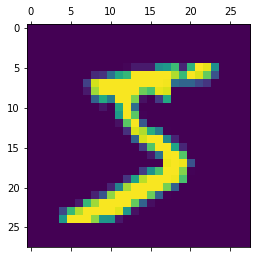

In [12]:
plt.matshow(X_train[0])

In [21]:
y_train[0]

5

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
#We have the dataset in 28*28 array but we need it in 1D array. 
#For that now we are going to flattened the array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [26]:
X_train_flattened.shape

(60000, 784)

In [27]:
X_test_flattened.shape

(10000, 784)

In [28]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Now let's create a simple neural network

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

'''
Here, 
Sequential means having stack of neural network.
So, it will accept every layer as one element.
Dense means all the neuron are connected with every other neuron.
10 means output layer and 784 means input layers.

'''

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4894 - accuracy: 0.8780
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3061 - accuracy: 0.9155
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2857 - accuracy: 0.9212
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2746 - accuracy: 0.9244
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2680 - accuracy: 0.9266


In [31]:
model.evaluate(X_test_flattened, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.26732214640676977, 0.9282]

In [32]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.4616718e-05, 0.0000000e+00, 5.0127506e-05, 8.3941221e-03,
       8.0466270e-07, 8.6963177e-05, 0.0000000e+00, 7.5430006e-01,
       4.1395426e-05, 6.1881542e-04], dtype=float32)

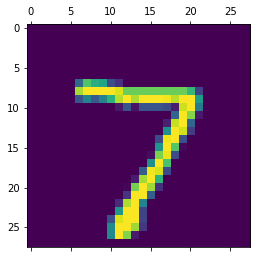

In [33]:
plt.matshow(X_test[0])

#### np.argmax finds a maximum element from an array and returns the index of it

In [35]:
np.argmax(y_predicted[0])

7

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [37]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: id=31185, shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    1,    0,    4,    4,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   9,    7,  933,   16,    8,    1,   13,   10,   32,    3],
       [   4,    0,   20,  928,    0,   15,    2,   14,   21,    6],
       [   2,    1,    4,    1,  923,    0,    9,    4,    8,   30],
       [  13,    3,    4,   37,   11,  762,   16,    8,   30,    8],
       [  13,    3,    6,    1,    8,    9,  915,    2,    1,    0],
       [   3,    6,   24,    3,    7,    0,    0,  966,    1,   18],
       [  12,    8,    8,   19,    9,   19,   10,   14,  867,    8],
       [  11,    7,    1,   11,   30,    7,    0,   32,    4,  906]],
      dtype=int32)>

Text(69,0.5,'Truth')

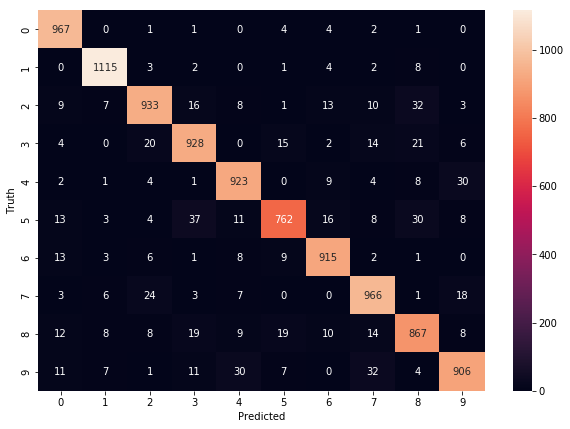

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using hidden layer

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2901 - accuracy: 0.9189
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1306 - accuracy: 0.9622
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0933 - accuracy: 0.9731
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0727 - accuracy: 0.9784
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0587 - accuracy: 0.9826


In [41]:
model.evaluate(X_test_flattened,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08478378480938263, 0.975]

Text(69,0.5,'Truth')

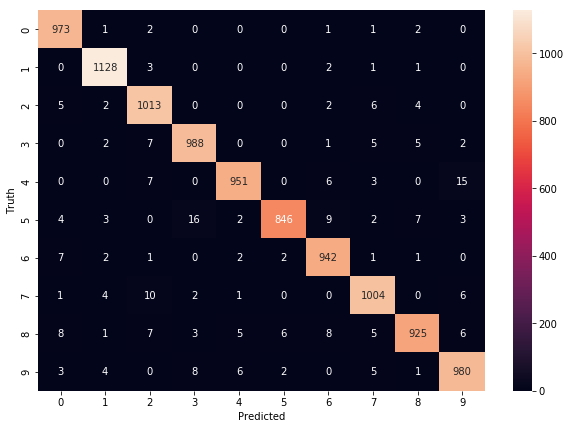

In [42]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2902 - accuracy: 0.9189
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1352 - accuracy: 0.9597
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0958 - accuracy: 0.9707
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0755 - accuracy: 0.9775
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0600 - accuracy: 0.9813
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0495 - accuracy: 0.9849
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0415 - accuracy: 0.9871
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0354 - accuracy: 0.9889
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0298 - accuracy: 0.9910
Epoch 10/10
60

In [52]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08624177171817282, 0.9752]